# 🎓 **Taller 4.1: Taller de Medidas de Similitud y Disimilitud**


## OBJETIVOS DEL TALLER:
Comprender y aplicar diferentes medidas de similitud y disimilitud en conjuntos de datos, analizando su comportamiento en distintos contextos de distribución de datos. Implementar y calcular al menos 6 medidas de distancia diferentes:

* ✅Distancia Euclidiana (L2)
* ✅Distancia Manhattan (L1)
* ✅Distancia Chebyshev (L∞)
* ✅Similitud de Coseno
* ✅Distancia de Mahalanobis
* ✅Distancia de Jaccard

Representar gráficamente datasets en espacios bidimensionales

* ✅Visualizar centros y puntos de referencia en gráficos de dispersión
* ✅Interpretar relaciones espaciales a partir de representaciones visuales

# 🔧 **CONFIGURACIÓN INICIAL**

In [20]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 8]

In [21]:
import scipy.stats as st

def visualize_dataset(x, y, ds_center, c1, c2):
  fig, ax = plt.subplots()
  ax.scatter(x, y)
  ds_center_r = [np.mean(x), np.mean(y)]
  print(f'Centro real del cluster: x={ds_center_r[0]:.2f}, y={ds_center_r[1]:.2f}')
  print(f'Centro del cluster utilizado para el ejemplo: x={ds_center[0]:.2f}, y={ds_center[1]:.2f}')
  ax.scatter(ds_center[0], ds_center[1], s=200, c='b')
  # plot candidates
  ax.scatter(c1[0], c1[1], s=200, c='r')
  ax.scatter(c2[0], c2[1], s=200, c='g', marker='v')
  deltaX = (max(x) - min(x))/10
  deltaY = (max(y) - min(y))/10
  xmin = min(x) - deltaX
  xmax = max(x) + deltaX
  ymin = min(y) - deltaY
  ymax = max(y) + deltaY
  # Create meshgrid
  xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
  positions = np.vstack([xx.ravel(), yy.ravel()])
  values = np.vstack([x, y])
  kernel = st.gaussian_kde(values)
  f = np.reshape(kernel(positions).T, xx.shape)
  # create gaussian contour lines
  cfset = ax.contourf(xx, yy, f, cmap='coolwarm', alpha=0.2)
  ax.imshow(np.rot90(f), cmap='coolwarm', extent=[xmin, xmax, ymin, ymax], alpha=0.2)
  # write labels
  cset = ax.contour(xx, yy, f, colors='k', linestyles='dotted')
  ax.clabel(cset, inline=1, fontsize=10)
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  plt.title('Kernel Gaussiano 2D')

In [22]:
def visualize_scatter(x, y, ds_center, c1, c2):
  ds_center_real= [np.mean(x), np.mean(y)]
  plt.figure(figsize=(8, 6))  # Tamaño del gráfico
  plt.scatter(x, y, color='blue', alpha=0.6, label='Puntos de datos')
  plt.scatter(ds_center[0], ds_center[1], color='red', marker='X', s=100, label='Centro [2, 2]')
  plt.scatter(ds_center_real[0], ds_center_real[1], color='y', marker='X', s=100, label='Centro Real')
  plt.scatter(c1[0], c1[1], s=200, c='red', label='Candidato 1 (rojo)')
  plt.scatter(c2[0], c2[1], s=200, c='green', marker='v', label='Candidato 2 (verde)')
  plt.xlabel('Variable 1 (data_var_1)')
  plt.ylabel('Variable 2 (data_var_2)')
  plt.title('Dataset 2D con Distribución Normal alrededor de [2, 2]')
  plt.grid(True, linestyle='--', alpha=0.5)
  plt.legend()
  plt.show()

# 📁 **CREAR LOS DATASETS Y GRAFIQUE SUS DISTRIBUCIONES**

In [23]:
# Crear un dataset artificial alrededor de un punto
def cargar_datasetDistNormal(n_data_points = 50, ds_center = np.array([2, 2])):
    # para hacer los experimentos reproducibles
    np.random.seed(42)
    # generamos los puntox en 2D con funcion normal, al rededor del centro
    data_var_1 = np.random.randn(n_data_points) + ds_center[0]
    data_var_2 = np.random.randn(n_data_points) + ds_center[1]
    return data_var_1, data_var_2

In [24]:
# Crear un dataset artificial alrededor de un punto con una relacion lineal de dependencia entre las variables
def cargar_datasetRelacionLineal(factor=np.array([1, 1]), n_data_points = 50, ds_center = np.array([2, 2])):
    # para hacer los experimentos reproducibles
    np.random.seed(42)
    # generar los datos con una relacion lineal
    data_var_1b = factor[0] * np.random.randn(n_data_points) + ds_center[0]
    data_var_2b = data_var_1b + factor[1] * np.random.randn(n_data_points)
    return data_var_1b, data_var_2b

In [25]:
# Crear un dataset artificial alrededor de un punto con una relacion cuadratica de dependencia entre las variables
def cargar_datasetRelacionCuadratica(coeficientes=np.array([1, 0, 0]),
                                     n_data_points=50,
                                     rango_x=(-5, 5)):
    #coeficientes : array de 3 elementos [a, b, c]
    #    Coeficientes de la ecuación cuadrática: y = a*x² + b*x + c
    # Para hacer los experimentos reproducibles
    np.random.seed(42)
    # Extraer coeficientes
    a, b, c = coeficientes
    # Generar valores x uniformemente distribuidos
    x = np.random.uniform(rango_x[0], rango_x[1], n_data_points)
    # Aplicar la transformación cuadrática
    y_ideal = a * x**2 + b * x + c
    # Añadir ruido aleatorio (proporcional al rango de y)
    rango_y = np.max(y_ideal) - np.min(y_ideal)
    ruido = 0.1 * rango_y * np.random.randn(n_data_points)
    y = y_ideal + ruido
    return x, y

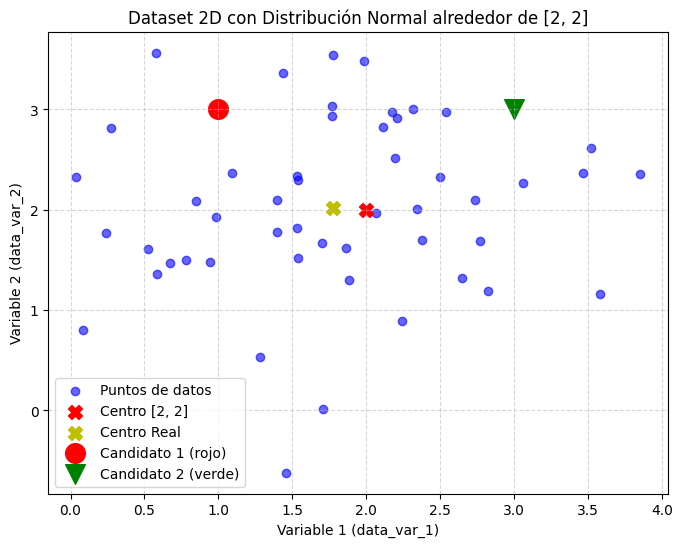

Centro real del cluster: x=1.77, y=2.02
Centro del cluster utilizado para el ejemplo: x=2.00, y=2.00


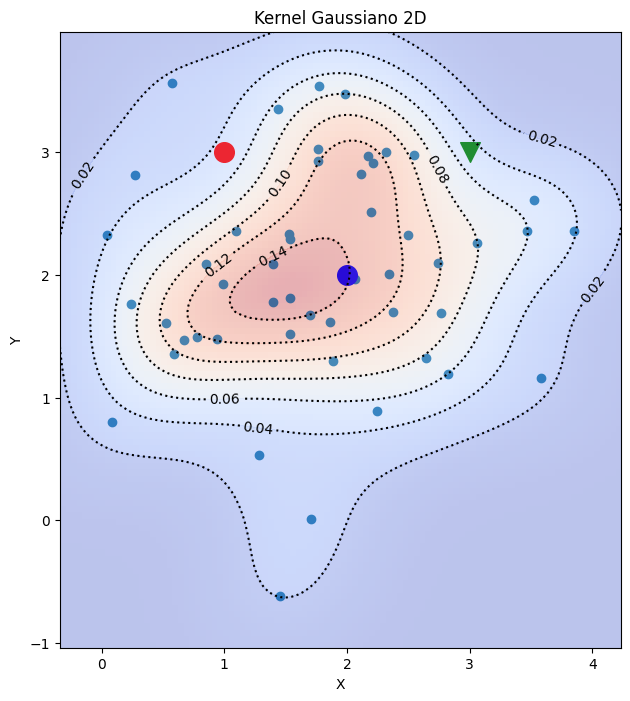

In [26]:
# Cargar dataset
ds_center = np.array([2, 2])
dx, dy =cargar_datasetDistNormal(50, ds_center)
# establecemos nuestros dos puntos candidatos de prueba
c1 = np.array([ds_center[0] - 1, 3])
c2 = np.array([ds_center[1] + 1, 3])
visualize_scatter(dx, dy, ds_center, c1, c2)
visualize_dataset(dx, dy, ds_center, c1, c2)

# 🎯 **EJ 1:GRAFIQUE LAS DISTRIBUCIONES DE LOS DATASETS**

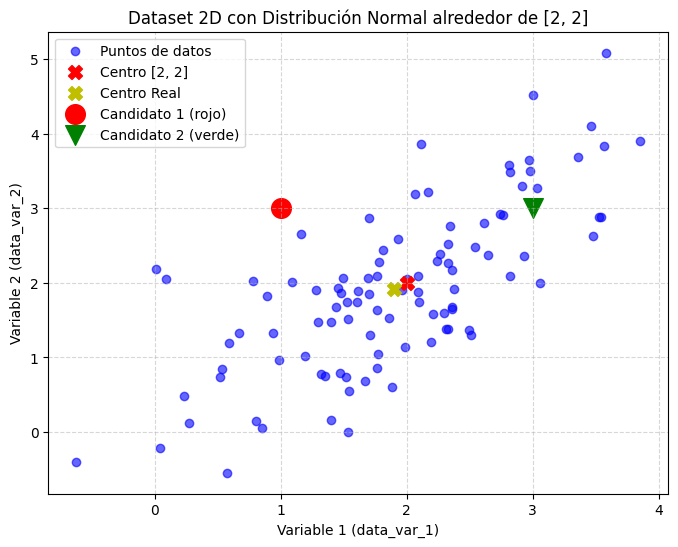

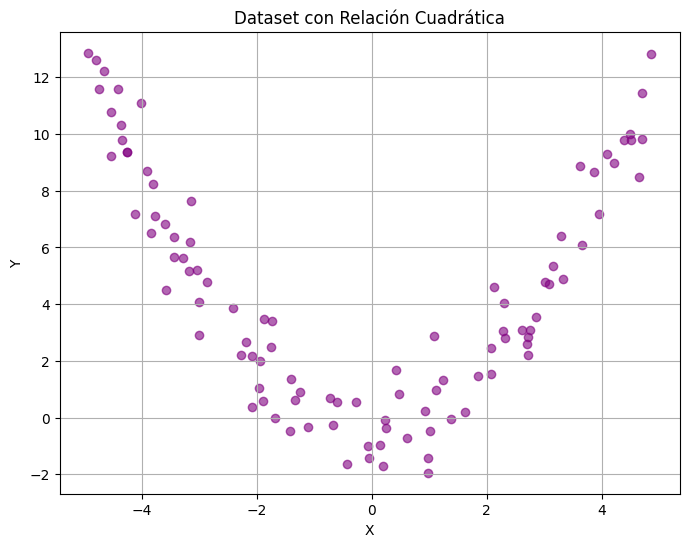

In [27]:
# TODO 1.1 crear y vizualizar el dataset con relacion lineal y con relacion cuadratica
dxr, dyr = cargar_datasetRelacionLineal(factor=np.array([1, 0.8]), n_data_points=100)
visualize_scatter(dxr, dyr, np.array([2,2]), np.array([1,3]), np.array([3,3]))

dx2, dy2 = cargar_datasetRelacionCuadratica(coeficientes=np.array([0.5, 0, 0]), n_data_points=100)

plt.figure(figsize=(8, 6))
plt.scatter(dx2, dy2, color='purple', alpha=0.6, label='Datos Cuadráticos')
plt.title('Dataset con Relación Cuadrática')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

In [28]:
# Dataset grande
dxGrande, dyGrande =cargar_datasetRelacionLineal([20,10], 1000, [50,100])

# 🎯 **EJ 2: IDENTIFIQUE QUE TAN DEPENDIENTES SON LOS DATASETS**

In [29]:
# TODO 2.1 : Use la covarianza para identificar que tan dependiente es la relacion que existe entre los registros de los datasets {dx,dy}, {dxr, dyr}, {dx2, dy2} y {dxGrande, dyGrande}
# su codigo aqui np.cov
print(f'Covarianza dataset Normal: \n {np.cov(dx, dy)[0,1]:.4f}')
print(f'Covarianza dataset Lineal: \n {np.cov(dxr, dyr)[0,1]:.4f}')
print(f'Covarianza dataset Lineal Grande: \n {np.cov(dxGrande, dyGrande)[0,1]:.4f}')
print(f'Covarianza dataset Cuadratico: \n {np.cov(dx2, dy2)[0,1]:.4f}')

Covarianza dataset Normal: 
 0.0899
Covarianza dataset Lineal: 
 0.7302
Covarianza dataset Lineal Grande: 
 375.6536
Covarianza dataset Cuadratico: 
 -1.6737


### 📈 **RESULTADOS:**
**Conteste las siguientes preguntas**

¿Qué dataset tiene una mayor dependencia lineal entre sus dos variables?

Segun los resultados el Dataset Lineal por que su valor esta cerca de 1.

¿Cual es el problema que tiene la covarianza?

No está normalizada. Si multiplicas los datos por 10, la covarianza aumenta enormemente aunque la relación sea la misma. Esto hace difícil comparar datasets con diferentes escalas.

In [30]:
# TODO 2.2: Use el coeficiente de correlación de Pearson para identificar que tan dependiente es la relacion que existe entre los registros de los datasets {dx,dy}, {dxr, dyr} y {dxGrande, dyGrande}
# su codigo aqui np.corrcoef
print(f'Correlación dataset Normal: \n {np.corrcoef(dx, dy)[0,1]:.4f}')
print(f'Correlación dataset Lineal: \n {np.corrcoef(dxr, dyr)[0,1]:.4f}')
print(f'Correlación dataset Grande: \n {np.corrcoef(dxGrande, dyGrande)[0,1]:.4f}')

Correlación dataset Normal: 
 0.1101
Correlación dataset Lineal: 
 0.7286
Correlación dataset Grande: 
 0.8874


### 📈 **RESULTADOS:**
**Conteste las siguientes preguntas**

¿Qué dataset tiene una mayor dependencia lineal entre sus dos variables?

El dataset con "Relación Lineal" (y el Grande) deberían tener un valor cercano a 1 o -1.

¿Que medida es mas facil de interpretar para identificar la dependencia entre dos variables de un dataset?

El Coeficiente de Pearson, porque siempre va de -1 a 1, independientemente de la magnitud de los datos.

# 🎯 **EJ 3: CREE LAS FUNCIONES DE LAS MEDIDAS DE DISIMILITUD**

In [31]:
#  TODO 3.1 completar el codigo de las funciones de las siguientes medidas de disimilitud:
#  Distancia Euclidiana, Distancia Manhattan, Distancia Chebyshev, Similitud de Coseno, Mahalanobis y Jaccard
#  En scipy.spatial.distance tenemos disponibles las distancias minkowski, mahalanobis, jaccard, hamming, euclidean, cosine, entre otras.
#  En numpy tenemos la norma p =  np.linalg.norm

from scipy.spatial import distance
import numpy as np


def distancia_euclidiana(p1, p2):
   dist = np.linalg.norm(p2 - p1, ord=2)
   return dist

def distancia_manhattan(p1, p2):
   # L1: Suma de diferencias absolutas
   dist = np.linalg.norm(p2 - p1, ord=1)
   return dist

def distancia_chebyshev(p1, p2):
   # L-infinito: La mayor diferencia en una sola dimensión
   dist = np.linalg.norm(p2 - p1, ord=np.inf)
   return dist

def similitud_coseno(p1, p2):
   dist = distance.cosine(p1, p2)
   return dist

def distancia_mahalanobis(p1, p2, inv_cov):
   # Requiere la inversa de la matriz de covarianza (VI)
   dist = distance.mahalanobis(p1, p2, inv_cov)
   return dist

def distancia_jaccard(p1, p2):
   # Jaccard suele usarse para conjuntos booleanos.
   # Scipy trata valores != 0 como True.
   dist = distance.jaccard(p1, p2)
   return dist

In [32]:
# Ejecutar funciones
print("🔍 Calculando las distancias de los puntos candidatos al centro")

# ---------------------------------------------------------
# 1. PRIMER DATASET (Distribución Normal: dx, dy)
# ---------------------------------------------------------
print('\n--- Distancias PRIMER dataset (Normal) ---')

# Calcular el centro real del dataset
ds_center = np.mean(np.array([dx, dy]), axis=1)

# Calcular matriz de covarianza inversa (necesaria para Mahalanobis)
cov_matrix = np.cov(np.vstack([dx, dy]))
inv_cov = np.linalg.inv(cov_matrix)

# Calcular distancias para Candidato 1 (c1)
print(f"\n>> Candidato 1: {c1}")
distancia_euclidiana(c1, ds_center)
distancia_manhattan(c1, ds_center)
distancia_chebyshev(c1, ds_center)
similitud_coseno(c1, ds_center)
distancia_mahalanobis(c1, ds_center, inv_cov)
distancia_jaccard(c1, ds_center)

# Calcular distancias para Candidato 2 (c2)
print(f"\n>> Candidato 2: {c2}")
distancia_euclidiana(c2, ds_center)
distancia_manhattan(c2, ds_center)
distancia_chebyshev(c2, ds_center)
similitud_coseno(c2, ds_center)
distancia_mahalanobis(c2, ds_center, inv_cov)
distancia_jaccard(c2, ds_center)


# ---------------------------------------------------------
# 2. SEGUNDO DATASET (Relación Lineal: dxr, dyr)
# ---------------------------------------------------------
print('\n\n--- Distancias SEGUNDO dataset (Lineal) ---')

# Calcular el centro del segundo dataset
ds_center_r = np.mean(np.array([dxr, dyr]), axis=1)

# Calcular matriz de covarianza inversa para el segundo dataset
cov_matrix_r = np.cov(np.vstack([dxr, dyr]))
inv_cov_r = np.linalg.inv(cov_matrix_r)

# Calcular distancias para Candidato 1 (c1) contra el nuevo centro
print(f"\n>> Candidato 1: {c1}")
distancia_euclidiana(c1, ds_center_r)
distancia_mahalanobis(c1, ds_center_r, inv_cov_r)
# Nota: Puedes agregar el resto de distancias aquí si lo deseas (Manhattan, etc.)

# Calcular distancias para Candidato 2 (c2) contra el nuevo centro
print(f"\n>> Candidato 2: {c2}")
distancia_euclidiana(c2, ds_center_r)
distancia_mahalanobis(c2, ds_center_r, inv_cov_r)

🔍 Calculando las distancias de los puntos candidatos al centro

--- Distancias PRIMER dataset (Normal) ---

>> Candidato 1: [1 3]

>> Candidato 2: [3 3]


--- Distancias SEGUNDO dataset (Lineal) ---

>> Candidato 1: [1 3]

>> Candidato 2: [3 3]


np.float64(1.223938120683032)

### 📈 **RESULTADOS:**
**Conteste las siguientes preguntas**

*¿Qué medidas de disimilitud son de un punto a otro punto?*

- Distancia Euclidiana: La distancia "en línea recta" estándar.

- Distancia Manhattan: La distancia moviéndose solo en ejes ortogonales (como un taxi en una ciudad cuadriculada).

- Distancia Chebyshev: La mayor diferencia en una sola de las dimensiones.

- Similitud (o Distancia) de Coseno: Mide el ángulo entre dos vectores (aunque técnicamente mide dirección, se compara vector a vector).

- Distancia de Jaccard: Mide la disimilitud entre conjuntos (o vectores binarios) comparando intersección y unión.

¿Por qué? Porque su fórmula matemática es del tipo f(P1​,P2​). No requieren información externa como promedios globales o matrices de covarianza, a diferencia de la de Mahalanobis.

*¿Qué medidas de disimilitud son de un punto a una distribución?*

La Distancia de Mahalanobis.

Punto a Distribución: A diferencia de la Euclidiana, Manhattan o Chebyshev (que miden la distancia geométrica fija entre dos puntos P1​ y P2​), la Distancia de Mahalanobis mide qué tan lejos está un punto de una distribución de datos completa.

¿Cómo lo hace?: Utiliza la matriz de covarianza (S) del dataset. Esto significa que "aprende" la forma de la nube de puntos.

 -  Si los datos están muy dispersos en una dirección, la distancia de Mahalanobis "acorta" esa dirección (considera que estar lejos ahí es más normal).

  - Si los datos están muy concentrados, cualquier desviación pequeña cuenta como una distancia grande.

*¿La distancia de Mahalanobis es capaz de tener en cuenta la distribución real de los datos?*

Sí, es capaz de tener en cuenta la distribución real porque utiliza la matriz de covarianza para "normalizar" las distancias basándose en la dispersión de los datos.

# 🔄 **EJ 4: MATRIZ DE DISTANCIAS**

Cree un metodo que sea capaz de calcular la matriz de distancias de todos los puntos de un dataset, recive como parametros la medida de disimilitud y en algunos casos la matriz de covarianza

In [33]:
import itertools as it

def matriz_distancias(X, funcion_distancia, mC=None):
    n_samples = X.shape[0]
    mD = np.zeros((n_samples, n_samples))

    # Pre-calcular inversa si es Mahalanobis y tenemos mC
    inv_cov = np.linalg.inv(mC) if mC is not None else None

    for i, j in it.product(range(n_samples), repeat=2):
        p1 = X[i]
        p2 = X[j]

        if mC is not None: # Asumimos que es Mahalanobis
            mD[i, j] = funcion_distancia(p1, p2, inv_cov)
        else:
            mD[i, j] = funcion_distancia(p1, p2)

    return mD

# Preparar datos para prueba (primeros 20 puntos para que no sea lento)
X_test = np.vstack((dx[:20], dy[:20])).T
mC_test = np.cov(X_test.T)

# Calcular
Ma_euclidea = matriz_distancias(X_test, distancia_euclidiana)
Ma_mahalanobis = matriz_distancias(X_test, distancia_mahalanobis, mC_test)

Text(0.5, 1.0, 'Mahalanobis')

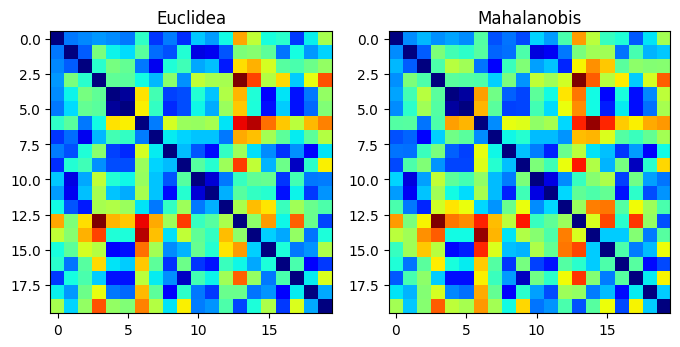

In [34]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(Ma_euclidea, cmap='jet')
ax[0].set_title('Euclidea')
ax[1].imshow(Ma_mahalanobis, cmap='jet')
ax[1].set_title('Mahalanobis')

In [35]:
#Hasta ahora hemos visto todo disimilitudes (distancias). ¿Y si quisiéramos una medida de similitud?
def matriz_similitud(X, funcion_distancia, mC=None):
    # 1. Calculamos la matriz de distancias primero
    mD = matriz_distancias(X, funcion_distancia, mC)

    # 2. Convertimos distancia a similitud
    # Similitud = 1 / (1 + Distancia) para evitar división por cero
    mS = 1 / (1 + mD)

    return mS

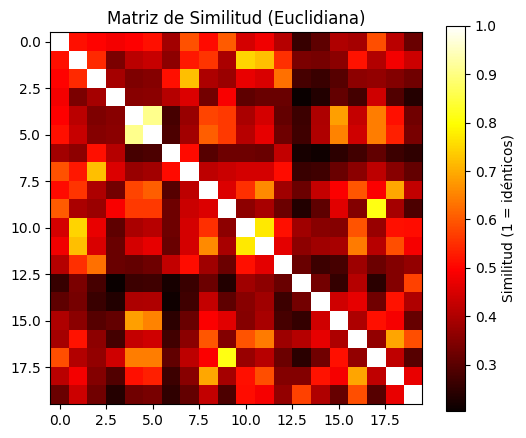

In [36]:
# Complete 4.3 Grafique la matriz de similitud
# Calcular similitud
Sim_euclidea = matriz_similitud(X_test, distancia_euclidiana)

# Graficar
plt.figure(figsize=(6, 5))
plt.imshow(Sim_euclidea, cmap='hot', interpolation='nearest')
plt.colorbar(label='Similitud (1 = idénticos)')
plt.title('Matriz de Similitud (Euclidiana)')
plt.show()

# ✅ **RESULTADOS:**
¿Cual grafico es mas facil de interpretar: el de una medida de disimilitud o de similitud?

La Matriz de Similitud suele ser más fácil de interpretar visualmente (mapas de calor) porque los valores altos (colores calientes/brillantes) indican agrupamiento o cercanía, lo cual es más intuitivo para nuestro cerebro que buscar valores bajos (ceros) de distancia.


# 🚀 ¡TALLER FINALIZADO!"